Mean Squared Error: 0.3992770222755521
R-squared: 0.3890230415724004


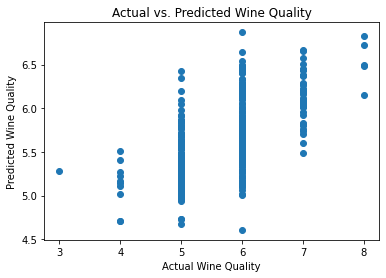

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Load the wine quality dataset from a CSV file
data = pd.read_csv('winequality-red.csv')

# Step 3: Explore and preprocess the data
# For simplicity, let's assume the 'quality' column is the target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Step 3a: Feature selection using SelectKBest (you can choose the number of features)
k_best = SelectKBest(score_func=f_regression, k=6)  # Select the top 6 features
X = k_best.fit_transform(X, y)

# Step 3b: Data preprocessing - Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train a linear regression model with hyperparameter tuning
param_grid = {'fit_intercept': [True, False]}
model = GridSearchCV(LinearRegression(), param_grid, cv=5)
model.fit(X_train, y_train)

# Step 6: Evaluate the model's performance
y_pred = model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 7: Make predictions
# You can use the trained model to make predictions for new data

# Optionally, you can visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Actual vs. Predicted Wine Quality")
plt.show()
